## AI_Lv8_CA2_v8

**CCT College Dublin**  
**Bachelor of Science Honours in Computing in Information Technology**  
**Introduction to Artificial Intelligence - Y4M1**  
**Year 4, Semester 7**  
**Continuous Assessment 2**

**Lecturer name:** David McQuaid  
**Lecturer email:** dmcquaid@cct.ie

**Student Name:** Mateus Fonseca Campos  
**Student Number:** 2023327  
**Student Email:** 2023327@student.cct.ie

**Submission date:** 19 November 2023

**GitHub:** https://github.com/2023327cctcollege/AI_Lv8_CA2_v8
___

### Contents

- [**Questions**](#Questions)
    - [Question 1](#Question-1)
    - [Question 2](#Question-2)
- [**References**](#References)

### Questions

#### Question 1

A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.

| <img src="./img/fig_1.png" width=500 /> |
| :-: |
| *Fig. 1: Graph abstraction of the puzzle* |

<br>

(a) The graph in Fig. 1 is a visualisation of the problem.  
&emsp;&emsp;(i) Identify the differences between a graph and a tree. [0-5]

**Graphs** are non-linear data structures used to represent relationships between objects. The objects are represented as points (called *vertices* or *nodes*) and the relationships as lines (called *edges*) connecting the objects. A graph is, therefore, a collection of a set of vertices and a set of edges (GeeksforGeeks, 2023a).

Graphs can be categorized in different ways (ibid.):

- **Null:** a graph with no edges.
- **Trivial:** a graph with only one vertex.
- **Undirected:** a graph whose edges do not have have a strict direction.
- **Directed:** a graph whose edges have a strict direction.
- **Connected:** a graph with no unreachable vertices.
- **Disconnected:** a graph with at least one unreachable vertex.
- **Regular:** a graph whose vertices all have the same degree K (i.e. the number of connected edges, e.g. K-regular, 2-regular, 4-regular etc).
- **Complete:** a graph where all vertices connect to each other directly (i.e. there is an edge for every pair of vertices).
- **Cycle:** a 2-regular graph where all vertices form only one cycle.
- **Cyclic:** a graph with at least one cycle.
- **Acyclic:** a graph with no cycles.
- **Bipartite:** a graph with two sets of vertices, where members of the same set are not connected.
- **Weighted:** a graph whose edges have an attributed weight or cost.

**Trees** are special, restricted, types of graphs, that is to say *every tree is a graph, but not every graph is a tree*. Therefore, trees are also non-linear data structures that represent relationships between objects with vertices/nodes connected by edges (ibid.).

The main restriction imposed by a tree is that the relationship between nodes is hierarchical. Nodes placed higher in the hierarchy are called *parent nodes* and the ones placed lower, *child nodes*. A node can have multiple child nodes, but only ever one parent node. The topmost node is the *root node* and it has no parent node. The bottommost nodes are the *leaf nodes* and have no child nodes (GeeksforGeeks, 2023b).

Like graphs, trees can also be categorized into types (ibid.):

- **Binary:** a tree whose nodes have, at most, two child nodes.
- **Ternary:** a tree whose nodes have, at most, three child nodes.
- **N-ary (Generic):** a tree whose nodes can have any number of child nodes.

In graph terms, a tree is always a connected acyclic graph (romin_vaghani, 2023).

| <img src="./img/fig_2.png" width=500 /> |
| :-: |
| *Fig. 2: Graph vs Tree* |

&emsp;&emsp;(ii) Explain in detail how the graph is an abstraction of the problem. [0-5]

A problem can be defined in terms of its *domain*, its *problem space*, which comprises two sets: *states* and *operators*. The states of a problem are the starting point, the goal and all the intermediary stages in-between. The operators cen be seen as functions that map a given state to another state (Holte *et al.*, 1996, p. 326).

Real-world problems can be have very complex domains, with either unknown or not well-understood confounding factors. Abstraction aims to simplify the problem space by manipulating states and operators deterministically to produce simpler, albeit approximated, problem spaces recursively until a route to the solution state is established (ibid., pp. 326-331).

A graph can be used to abstract a problem by mapping the latter’s states and operators to the former’s vertices and edges, respectively. If a solution to the problem is a sequence of operators changing states throughout the problem space from the starting point to the goal, then its abstracted graph counterpart should reach the solution by determining a series of edges from the starting vertex to the goal vertex. This series of edges is called a *path*. The weight/cost/length associated with each edge in the graph helps the process of *pathfinding* to assess and rank the viability of the paths found when more than one path to the solution is possible (ibid., p. 332).

&emsp;&emsp;(iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1. [0-5]

As discussed in Question 1.(a).(i) and Question 1.(a).(ii), graphs are flexible data structures that can be used to model various different scenarios. It offers a high-level abstraction that potentially allows for deterministic analysis of complex problems. By reducing entity relationships to a collection of objects and values, solutions and insights can be drawn by tackling problems algorithmically through standardized and comparable techniques.

(b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. [0-25]

Dijkstra's algorithm works by traversing the whole graph iteractively. As each node is visited, its distance to the start node is updated based on the traversed path so far, choosing always the shortest route. Once all nodes have been visited, the path to the target node is the shortest possible, provided that it can be found.

The below is a flowchart of the algorithm:

| <img src="./img/fig_3.png" width=500 /> |
| :-: |
| *Fig. 3: Dijkstra's flowchart* |

<br>

*Note: when considering how to visualize the solution to this problem, I thought it was a nice idea to present it as an animation. Unfortunately, this proved much more complicated than I had anticipated and the results are admittedly underwhelming. In any case, the source code for the module I created can be found at the root folder of this project. In short, it models the graph as an XML tree based on the Draw.io mxGraph pattern to allow for the manipulation of its parts.*

In [1]:
from pymxgraph import MGX

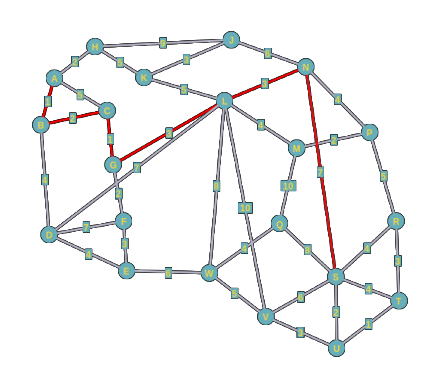

In [2]:
mgx = MGX('./img/obj/graph.xml')
path = mgx.dijkstra('A', 'S')
mgx.show(paths=[path], animated=True)

#### Question 2

The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed. [0-60]

#### Implementation of the Dijkstra's search algorithm

The following is a pseucode of the Dijkstra's algorithm:

<div style="font-size: 0.95em;">
    
    function Dijkstra(Graph, source):
        dist[source]  := 0                     // Distance from source to source is set to 0
        for each vertex v in Graph:            // Initializations
            if v ≠ source
                dist[v]  := infinity           // Unknown distance function from source to each node set to infinity
            add v to Q                         // All nodes initially in Q

        while Q is not empty:                  // The main loop
            v := vertex in Q with min dist[v]  // In the first run-through, this vertex is the source node
            remove v from Q 

            for each neighbor u of v:          // where neighbor u has not yet been removed from Q.
                alt := dist[v] + length(v, u)
                if alt < dist[u]:              // A shorter path to u has been found
                    dist[u]  := alt            // Update distance of u 

        return dist[]
    end function

</div>

||
| :-: |
| *Dijkstra's search algorithm pseucode (Abiy et al., 2023a)* |

The algorithm's implementation in Python:

In [3]:
from collections import deque

def dijkstra(graph, source, target):
    q = deque()
    path = []
    previous = {}
    dist = {source: 0}
    for v in graph:
        if v != source:
            dist[v] = float('infinity')
        q.append(v)
        
    while len(q) > 0:
        v = min(q, key=lambda v: dist[v])
        
        if v == target:         
            path.append(v)
            while previous[v] != source:
                path.append(previous[v])
                v = previous[v]
            path.append(previous[v])
            path.reverse()
            return path
        
        q.remove(v)
        
        for u in graph[v]:
            alt = dist[v] + graph[v][u]
            if alt < dist[u]:
                previous[u] = v
                dist[u] = alt
            
    return dist

In [4]:
d_path = dijkstra(mgx.adj_list, 'A', 'S')

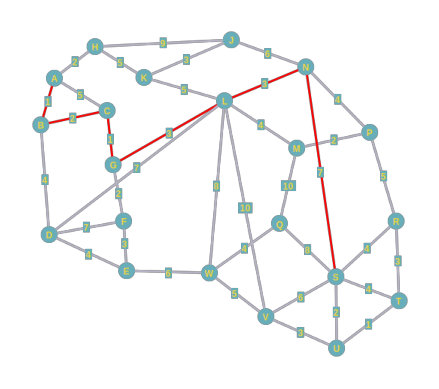

In [5]:
mgx.show(paths=[d_path], animated=False)

#### Implementation of the A* search algorithm

The following is a pseucode of the A* algorithm:

<div style="font-size: 0.95em;">
    
    make an openlist containing only the starting node
    make an empty closed list
    while (the destination node has not been reached):
        consider the node with the lowest f score in the open list
        if (this node is our destination node) :
            we are finished 
        if not:
            put the current node in the closed list and look at all of its neighbors
            for (each neighbor of the current node):
                if (neighbor has lower g value than current and is in the closed list) :
                    replace the neighbor with the new, lower, g value 
                    current node is now the neighbor's parent            
                else if (current g value is lower and this neighbor is in the open list ) :
                    replace the neighbor with the new, lower, g value 
                    change the neighbor's parent to our current node

                else if this neighbor is not in both lists:
                    add it to the open list and set its g

</div>

||
| :-: |
| *A\* search algorithm pseucode (Abiy et al., 2023b)* |

The algorithm's implementation in Python:

In [6]:
from collections import deque
import math

def h(p, q, pos):
    return math.sqrt(math.pow(pos[q]['x'] - pos[p]['x'], 2) + math.pow(pos[q]['y'] - pos[p]['y'], 2))

def a_star(graph, pos, source, target):
    open_list = [source]
    closed_list = []
    path = []
    
    g = {source: 0}
    f = {source: h(source, target, pos)}
    previous = {}
    for v in graph:
        previous[v] = None
        if v != source:
            g[v] = f[v] = float('infinity')
    
    while len(open_list) > 0:
        v = min(open_list, key=lambda v: f[v])
        
        if v == target:         
            path.append(v)
            while previous[v] != source:
                path.append(previous[v])
                v = previous[v]
            path.append(previous[v])
            path.reverse()
            return path
        
        open_list.remove(v)
        closed_list.append(v)
        
        for u in graph[v]:
            if u in closed_list:
                continue
            
            tent_g = g[v] + graph[v][u]
            
            if tent_g < g[u]:
                previous[u] = v
                g[u] = tent_g
                f[u] = tent_g + h(u, target, pos)
                
                if u not in open_list:
                    open_list.append(u)
                    
    return 'No path found!'

In [7]:
a_path = a_star(mgx.adj_list, mgx.coordinates, 'A', 'S')

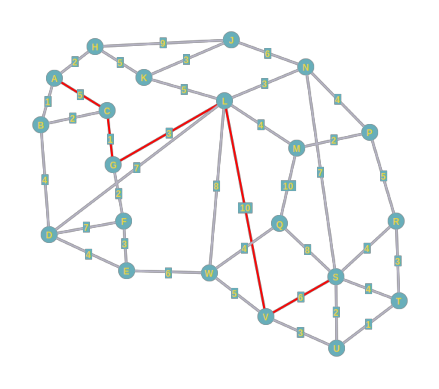

In [8]:
mgx.show([a_path], animated=False)

#### Comparison between Dijkstras's and A* algorithms

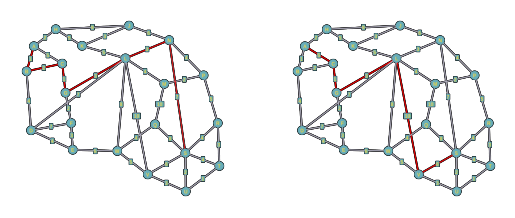

In [9]:
mgx.show(paths=[d_path, a_path], animated=True)

To calculate the worst-case time complexity, it is necessary to consider how dense (or sparse) the graph is and the data structure used to in the implementation of the algorithms (Simic, 2023).

Dijkstra's has both space and time completxity of $O(|V|²)$ when implemented naively. However, if making use of a Fibonnaci heap, space complexity is reduced to $O(|V|)$ and time complexity to $O(|E|+|V|log|V|)$ (ibid.).

In the worst-case scenario, A* behaves just like Dijkstra, with space complexity $O(|V|)$ and time complexity $O(|V|+|E|)$. However, if an appropriate heuristics is selected, then the algorithm's complexity should be $O(b^{\lfloor{\frac{C^*}{\epsilon}}\rfloor+1})$ (ibid.).

The code below compares the actual time it takes for both algorithms to run:

In [10]:
import time

def stopwatch(func_1, func_2=None):
    s = time.process_time_ns()
    func_1
    e = time.process_time_ns()
    t_1 = e - s
    
    if func_2:
        s = time.process_time_ns()
        func_2
        e = time.process_time_ns()
        t_2 = e - s
        
        return t_1 / t_2
    
    return t_1

In [11]:
dij, ast, dij_ast = [], [], []

for i in range(1000):
    dij.append(stopwatch(dijkstra(mgx.adj_list, 'A', 'S')))
    ast.append(stopwatch(a_star(mgx.adj_list, mgx.coordinates, 'A', 'S')))
    dij_ast.append(stopwatch(a_star(mgx.adj_list, mgx.coordinates, 'A', 'S'), dijkstra(mgx.adj_list, 'A', 'S')))

print(f"Dijkstra's average processing time: {sum(dij)/len(dij):.2f} ns")
print(f"A* average processing time: {sum(ast)/len(ast):.2f} ns")
print()
print(f"A* runs, on average, {sum(dij_ast)/len(dij_ast):.2f} faster than Dijkstra's.")

Dijkstra's average processing time: 1509.43 ns
A* average processing time: 1555.68 ns

A* runs, on average, 1.27 faster than Dijkstra's.


### References

Abiy, T. *et al*. (2023a). *Dijkstra's Shortest Path Algorithm*. Brilliant.org. Available at: https://brilliant.org/wiki/dijkstras-short-path-finder/ (Accessed: 19 November 2023).

Abiy, T. *et al*. (2023b). *A\* Search*. Brilliant.org. Available at: https://brilliant.org/wiki/a-star-search/ (Accessed: 19 November 2023).

GeeksforGeeks. (2023a). *Introduction to Graphs – Data Structure and Algorithm Tutorials*. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/introduction-to-graphs-data-structure-and-algorithm-tutorials/ (Accessed: 18 November 2023).

GeeksforGeeks. (2023b). *Introduction to Tree – Data Structure and Algorithm Tutorials*. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/introduction-to-tree-data-structure-and-algorithm-tutorials/ (Accessed: 18 November 2023).

Holte, R.C. *et al*. (1996). *Speeding up problem solving by abstraction: a graph oriented approach*. Artificial Intelligence, 85(1-2), pp. 321-361. Available at: https://doi.org/10.1016/0004-3702(95)00111-5 (Accessed: 18 November 2023).

romin_vaghani. (2023). *Difference between graph and tree*. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/difference-between-graph-and-tree/ (Accessed: 18 November 2023).

Simic, M. (2023). *Dijkstra vs. A* – Pathfinding*. Baeldung. Available at: https://www.baeldung.com/cs/dijkstra-vs-a-pathfinding (Accessed: 19 November 2023).